<a href="https://colab.research.google.com/github/Sujo04/Online-Advertisement-Click-Prediction/blob/main/Copy_of_Ad_Click_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ad Click Prediction**


# **Goal of the Project**

Goal of the project is to predict if a particular user is likely to click on particular ad or not based on his feature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
dataframe = pd.read_csv(io.StringIO(uploaded['advertising.csv'].decode('utf-8')))

Saving advertising.csv to advertising (2).csv


KeyError: 'advertising.csv'

In [ ]:
dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,City Codes,Country Codes,Month,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,961,215,03,00
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,903,147,04,01
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,111,184,03,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,939,103,01,02
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,805,96,06,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,126,116,02,21
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,488,26,04,02
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,798,140,02,17
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,935,85,03,02


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  City Codes                1000 non-null   int16  
 11  Country Codes             1000 non-null   int16  
 12  Month                     1000 non-null   object 
 13  Hour                      1000 non-null   object 
dtypes: float6

## **Are there any duplicate records present?**

In [ ]:
dataframe.duplicated().sum()

0

As the value above is zero, there are no duplicates.

# Attribute Type Classification

## Determing the type of attributes in the given dataset

In [ ]:
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [ ]:
categorical_columns = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

# Exploratory Data Analysis

## What age group does the dataset majorly consist of?

<ipython-input-78-3e9290afe183>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))


<Axes: xlabel='Age', ylabel='Density'>

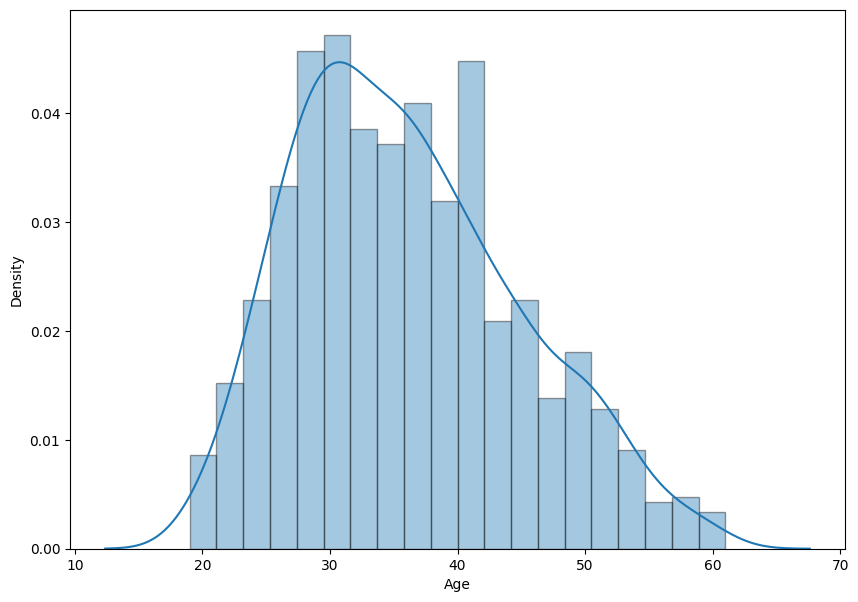

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(dataframe['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

In [ ]:
print('Age of the oldest person:', dataframe['Age'].max(), 'Years')
print('Age of the youngest person:', dataframe['Age'].min(), 'Years')
print('Average age in dataset:', dataframe['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


## What is the income distribution in different age groups?

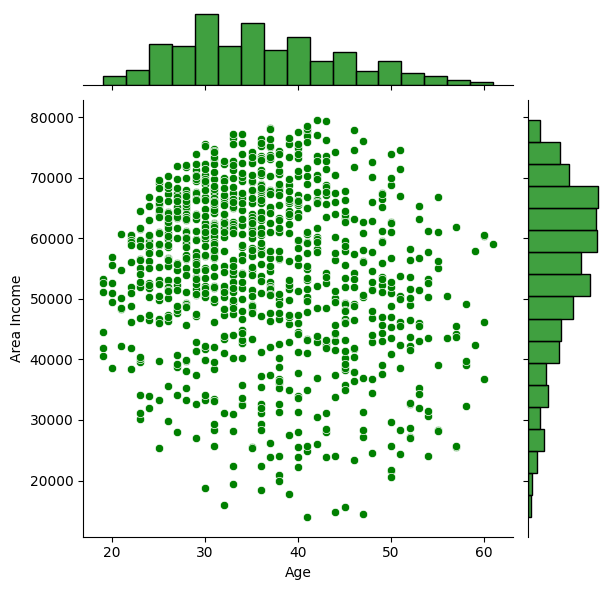

In [ ]:
sns.jointplot(x='Age', y='Area Income', color= "green", data= dataframe)

Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

## Which age group is spending maximum time on the internet?

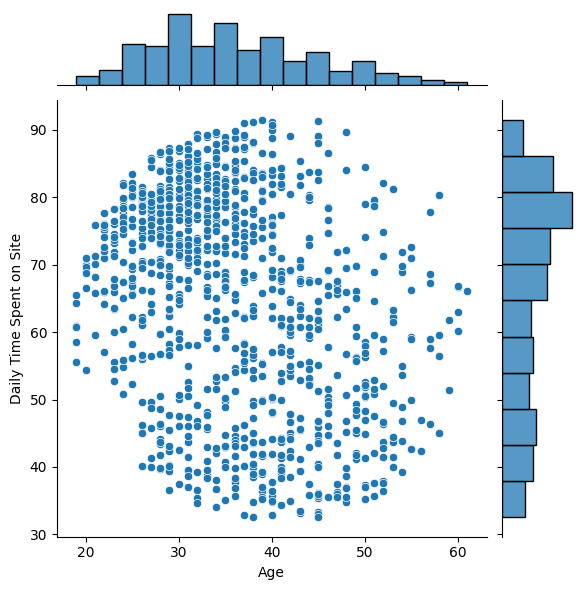

In [ ]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= dataframe)

From the above plot its evident that the age group of 25-40 is most active on the internet.

## Which gender has clicked more on online ads?



In [ ]:
dataframe.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Based on above data we can see that a greater number of females have clicked on ads compared to male.

## **Maximum number of internet users belong to which country in the given dataset?**

In [ ]:
pd.crosstab(index=dataframe['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


Based on the above data frame we can observe that maximum number of users are from France and Czech.

## Did we match our baseline that we set?

In [ ]:
dataframe.groupby('Clicked on Ad')[['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income',
                            'Daily Internet Usage']].mean()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


# What is the relationship between different features?

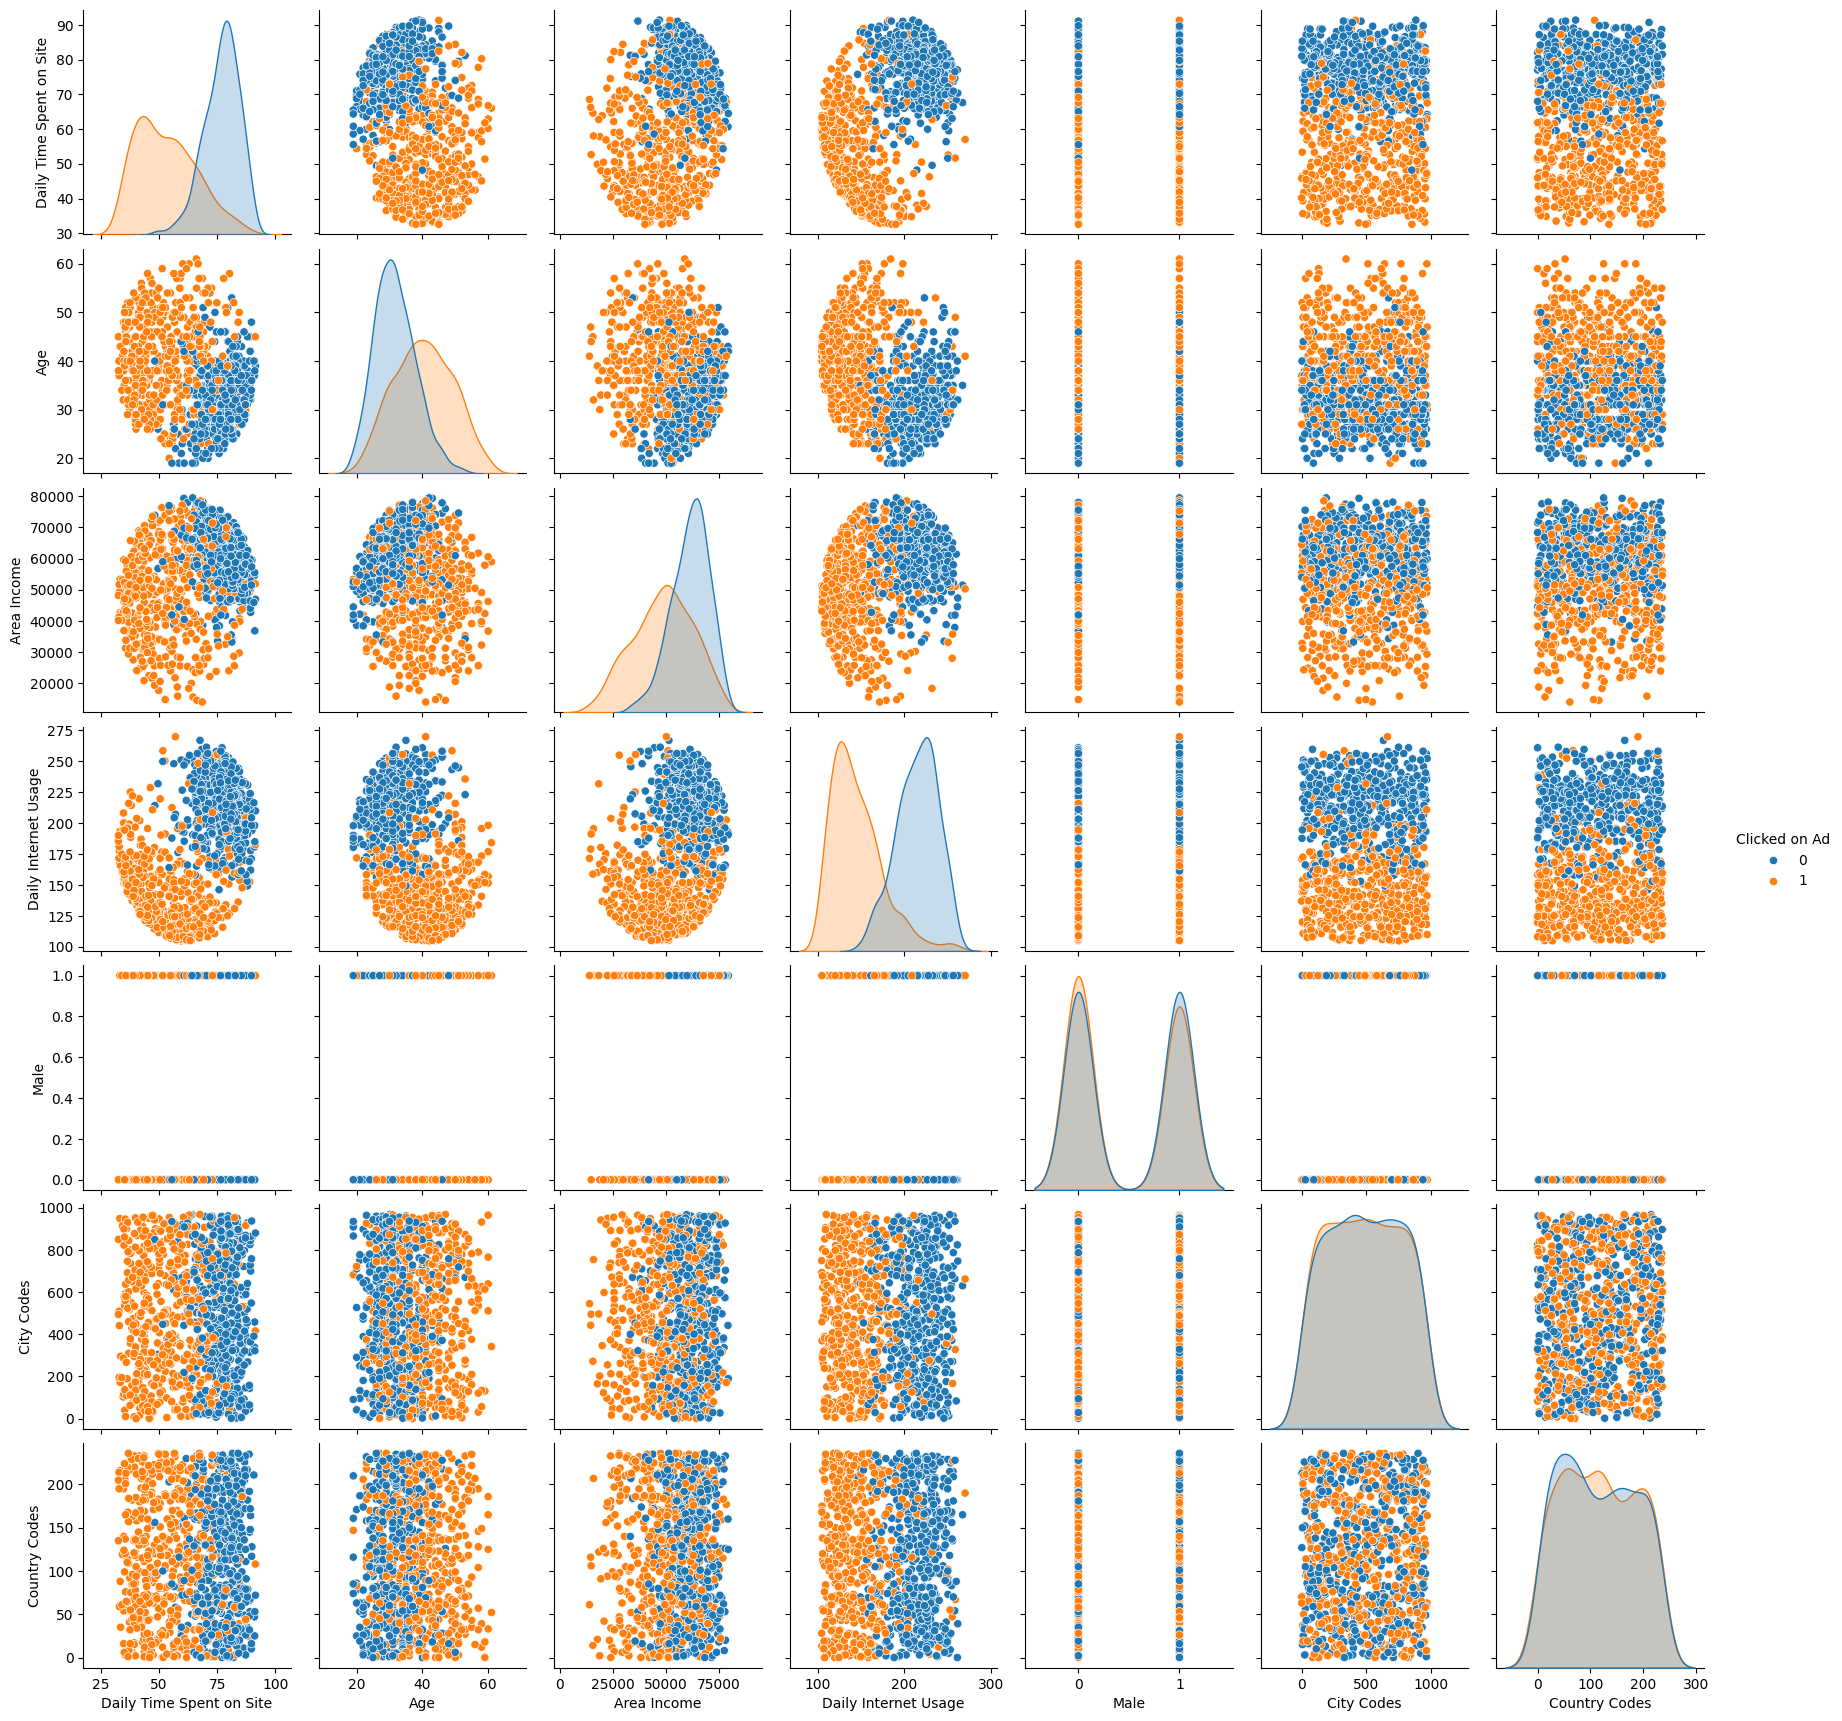

In [ ]:
sns.pairplot(dataframe, hue='Clicked on Ad')

# Data Cleaning

<Axes: >

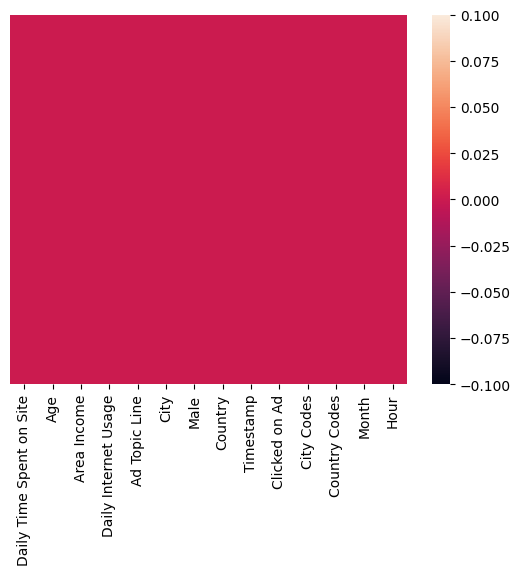

In [ ]:
sns.heatmap(dataframe.isnull(), yticklabels=False)

As we see, we don't have any missing data

Considering the 'Advertisement Topic Line', we decided to drop it. In any case, if we need to extract any form of interesting data from it, we can use Natural Language Processing.

As to 'City' and the 'Nation', we can supplant them by dummy variables with numerical features, Nonetheless, along these lines we got such a large number of new highlights.

Another methodology would be thinking about them as a categorical features and coding them in one numeric element.

Changing 'Timestamp' into numerical value is more complicated. So, we can change ‘Timestamp’ to numbers or convert them to spaces of time/day and consider it to be categorical and afterwards we converted it into numerical values. And we selected the month and the hour from the timestamp as features

In [ ]:
dataframe['City Codes']= dataframe['City'].astype('category').cat.codes

In [ ]:
dataframe['Country Codes'] = dataframe['Country'].astype('category').cat.codes

In [ ]:
dataframe[['City Codes','Country Codes']].head(5)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


In [ ]:
dataframe['Month'] = dataframe['Timestamp'].apply(lambda x: x.split('-')[1])
dataframe['Hour'] = dataframe['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

In [ ]:
dataframe[['Month','Hour']].head(5)

,Month,Hour
0,03,00
1,04,01
2,03,20
3,01,02
4,06,03


# Data Model Implementation

Dropping

In [ ]:
X = dataframe.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [ ]:
Y = dataframe['Clicked on Ad']

**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

**Implementing Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_model = LogisticRegression()

In [ ]:
log_reg_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg_pred = log_reg_model.predict(X_test)

**Implementing Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nav_bayes_model = GaussianNB()

In [ ]:
nav_bayes_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
nav_bayes_pred = nav_bayes_model.predict(X_test)

**Implementing Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree_model = DecisionTreeClassifier()

In [ ]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dec_tree_pred = dec_tree_model.predict(X_test)

**implementing random forest model**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf_classifier.predict(X_test)

**Finding accuracy in each model**

In [ ]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [ ]:
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print(log_reg_accuracy*100)

90.66666666666666


In [ ]:
from sklearn.metrics import confusion_matrix

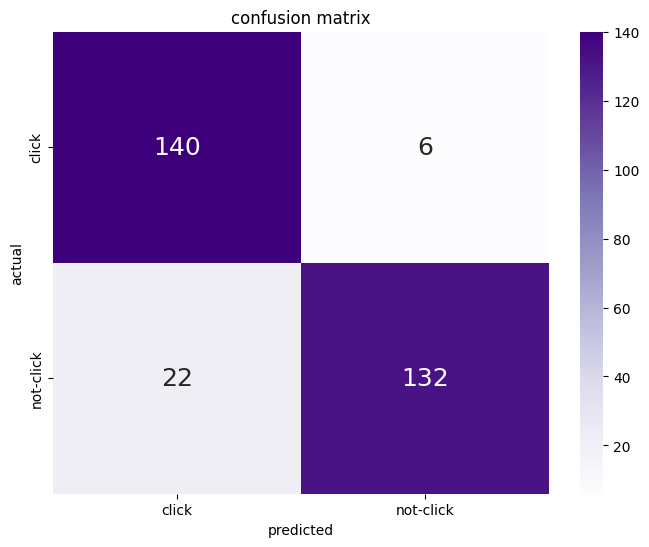

In [ ]:
cm=confusion_matrix(Y_test,log_reg_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Purples',fmt='d',annot_kws={'size':18},xticklabels=['click','not-click'],yticklabels=['click','not-click'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

### Naive Bayes

In [ ]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

96.0


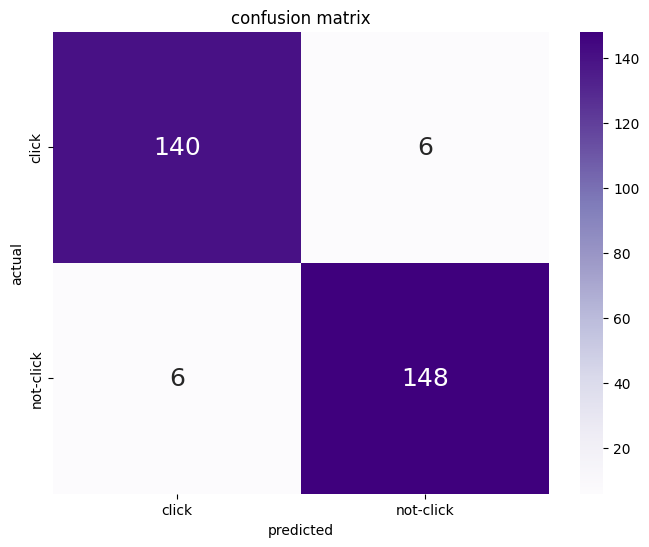

In [ ]:
cm=confusion_matrix(Y_test,nav_bayes_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Purples',fmt='d',annot_kws={'size':18},xticklabels=['click','not-click'],yticklabels=['click','not-click'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

### Decision Tree

In [ ]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

93.66666666666667


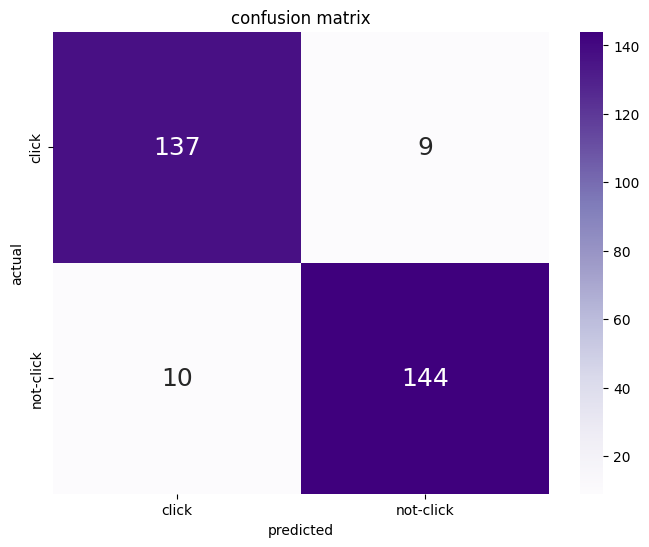

In [ ]:
cm=confusion_matrix(Y_test,dec_tree_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Purples',fmt='d',annot_kws={'size':18},xticklabels=['click','not-click'],yticklabels=['click','not-click'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

**random forest**

In [ ]:
rf_accuracy = accuracy_score(rf_pred, Y_test)
print(rf_accuracy*100);


94.33333333333334


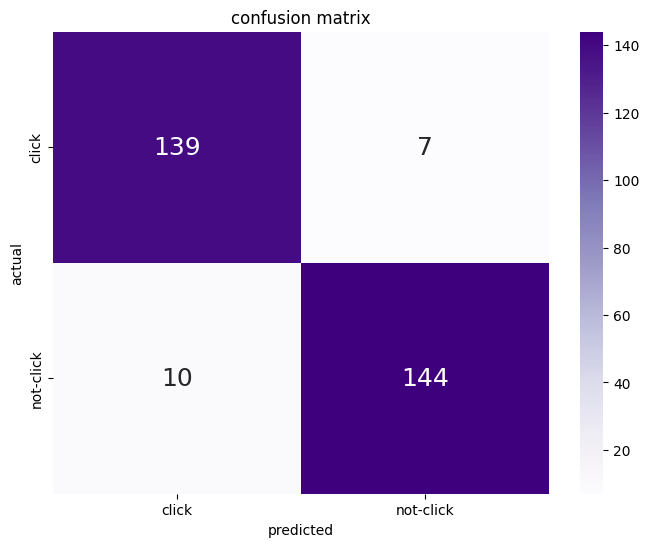

In [ ]:
cm=confusion_matrix(Y_test,rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Purples',fmt='d',annot_kws={'size':18},xticklabels=['click','not-click'],yticklabels=['click','not-click'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

# Conclusion

### After comparing all the above implementation models, we conclude that Naive Bayes Algorithm gives us the maximum accuracy for determining the click  probability. We believe in future there will be fewer ads, but they will be more relevant. And also these ads will cost more and will be worth it.